# AUTHOR : CHIOMA OBIOHA

# TASK 1: Predictive Analysis with Supervised Machine Learning Algorithm
# Data Science and Business Analytics Intern  
# GRIP @ The Sparks Foundation

The aim of this task is to build a machine learning model to predict the scores of students based on the hours of study. 

This task requires a simple linear regression involving two variable; x = independent and y = dependant. The Independent variable(x) would be used to manipulate the dependant y, showing the relationship between the two variables. In clear terms, the x(hours) of study determine the y(scores), attained by students.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Load the dataset

In [3]:
URL = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(URL)

# Dataset overview

In [27]:
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
student_data.shape

(25, 2)

In [7]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualize dataset

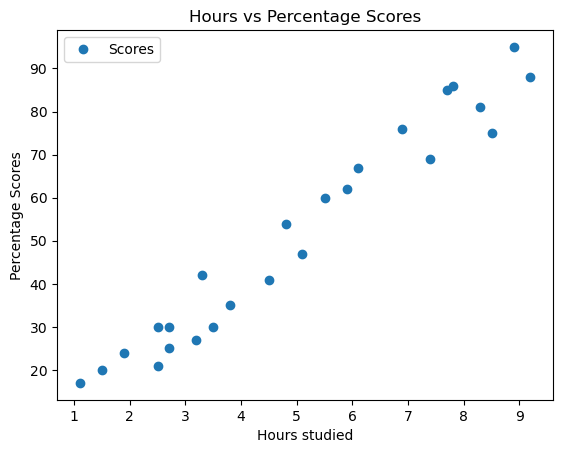

In [9]:
student_data.plot( x = 'Hours', y = 'Scores', style = 'o')
plt.xlabel ('Hours studied')
plt.ylabel ('Percentage Scores')
plt.title('Hours vs Percentage Scores')
plt.show()

From the above graph, it is evident that there is a positive correlation between hours a student study and the percentage score

It shows a positive linear regression between the hours of studied and percentage of score. 
Students who study longer hours tend to have remarkable high scores.

Check Correlation between hours and scores

In [10]:
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing dataset


In preparing our data, here we divide our data into features(inputs) and labels (outputs)

In [14]:
x = student_data.iloc[:,:-1]
y = student_data.iloc[:, 1]

In [15]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [16]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

Now that data has been divided in attributes and labels, 

next is to SPLIT the data into training and testing sets, using the sckit-learn train_test_split()method.

# Split data into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print("split successful")

split successful


Now the data split is done, its time to train the algorithm

# Training the Algorithm

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

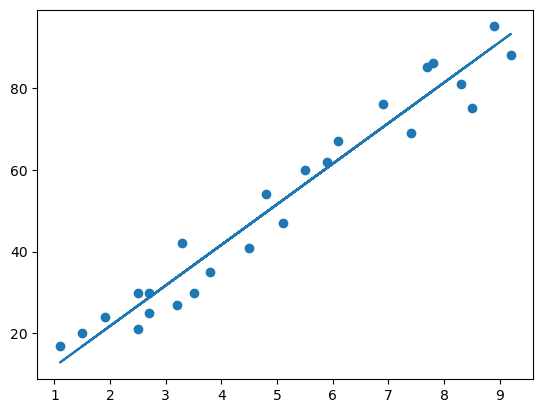

In [19]:
# Visualize the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making Prediction

Now training has been completed, its time to make prediction of future score of students based on the hours of study

In [20]:
#Testing data - In Hours
print(x_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [21]:
#Predicting the scores
y_pred = reg.predict(x_test) 

In [22]:
reg.predict(x_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual and Predicted Scores

In [23]:
df = pd.DataFrame ({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


From the above, the regression model would pass for a good one, 
because it minimises the difference between the actual and predicted values

In [ ]:
#Testing with my own data, a random prediction

In [24]:
#Predict scores of student who studied for 20 hours

reg.predict([[20]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([200.23128965])

In [25]:
#Predict scores of student who studied for 3 hours

reg.predict([[3]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.75012948])

# Evaluate the Model

In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error (y_test, y_pred))

Mean Absolute Error: 4.183859899002975


Looking at the above, the mean absolute error is quite small, so the model predictions are accurate and align closely with the actual values, hence it can make predictions with minimal error

# Thank you